<a href="https://colab.research.google.com/github/reneronaldo10/PROCESAMIENTO-DE-IMAGENES/blob/main/PRACTICAS_2/Semana_7_PDSeI_Practica_Redes_Neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1.Gutiérrez Córdova René Ronaldo

2.Vasquez Silva Augusto Martin

3.Quezada Portilla Diego Armando

4.Alcantara Vasquez Cristhofer Jorge

Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [ ]:
!pip install -q kaggle
!pip install -q scikeras

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reneronaldo","key":"d19af2ce589885ca19e5fa7b4c0b01ea"}'}

# Descargar la base de datos

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 75% 47.0M/62.6M [00:00<00:00, 244MB/s]
100% 62.6M/62.6M [00:00<00:00, 244MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [ ]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [ ]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


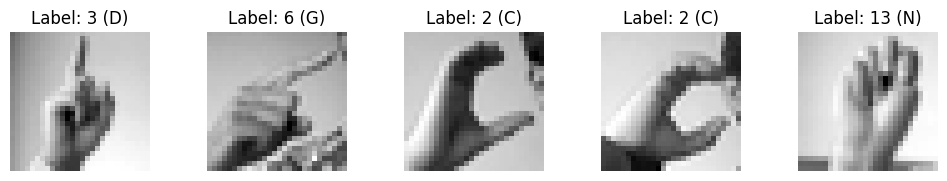

In [ ]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?
  La data argumentation es una tecnica para aumentar la cantidad de datos aplicando transformaciones ayudando a la CNN a mejorar su generalización, aumentar el tamaño efectido de la base de datos, hacerla mas robusta frente a variaciones e INCREMENTAR

2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?
```La normalización de los datos de entrada ajusta los valores a un rango uniforme, acelerando el entrenamiento del modelo, mejorando la estabilidad, optimizando el rendimiento y presición del modelo.




# Creación del modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?
  Conv2D extrae características locales de las imágenes, mientras que MaxPooling2D reduce la dimensión espacial y retiene las características más importantes, disminuyendo la carga computacional.

2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
  Es una técnica que desactiva aleatoriamente neuronas durante el entrenamiento para evitar el sobreajuste y mejorar la generalización del modelo.

3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?
  Se usa en capas ocultas por su simplicidad y eficiencia al introducir no linealidades, evitando problemas de gradientes y acelerando el aprendizaje.

4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?
  Convierte las salidas en probabilidades, usada en la capa de salida para clasificación de múltiples clases.

5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?
  Determina el tamaño del área analizada en cada convolución; filtros más grandes capturan patrones globales, mientras que los pequeños capturan detalles locales.

6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?
  Reduce la resolución de salida, disminuyendo el tamaño de la representación espacial y acelerando el procesamiento.

7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?
  Tamaños de filtro pequeños y strides de 1 suelen capturar mejor los detalles, mientras que tamaños mayores simplifican el modelo; el balance depende de la complejidad deseada y la capacidad de generalización.
```



# Terminación anticipada y Checkpoints

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [ ]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?

Detiene el entrenamiento cuando el rendimiento en validación deja de mejorar, evitando el sobreajuste y ahorrando recursos.

2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?

Guarda el mejor modelo durante el entrenamiento, asegurando que se conserve la versión óptima alcanzada.

```

# Entrenamiento

In [ ]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


855/858 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1087 - loss: 2.9586 Modelo guardado época 1 con exactitud: 0.6180
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.1092 - loss: 2.9566 - val_accuracy: 0.6180 - val_loss: 1.3000
Epoch 2/5
850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4936 - loss: 1.5076 Modelo guardado época 2 con exactitud: 0.7695
858/858 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.4942 - loss: 1.5057 - val_accuracy: 0.7695 - val_loss: 0.6517
Epoch 3/5
850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6691 - loss: 0.9560 Modelo guardado época 3 con exactitud: 0.8271
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6694 - loss: 0.9553 - val_accuracy: 0.8271 - val_loss: 0.4479
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7448 - loss: 0.7246 Modelo guardado época 4 con exactitud: 0.8820
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7448 - loss: 0.7246 - val_accuracy: 0.8820 - val_loss: 0.3214
Epoch 



```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?
  Indica el número de veces que el modelo verá todo el conjunto de entrenamiento. Más epochs pueden mejorar el aprendizaje, pero demasiadas pueden llevar al sobreajuste.

2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?
  train_generator genera datos para entrenar el modelo, aplicando aumentación, mientras que val_generator proporciona datos para evaluar el rendimiento sin afectarlo, sin aplicar aumentación.
```



# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


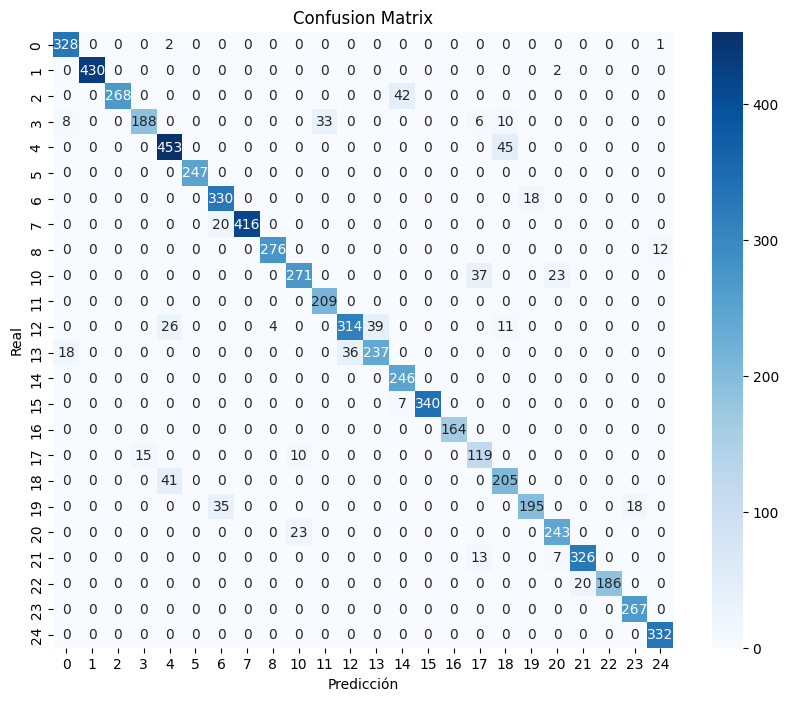

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       331
           1       1.00      1.00      1.00       432
          10       1.00      0.86      0.93       310
          11       0.93      0.77      0.84       245
          12       0.87      0.91      0.89       498
          13       1.00      1.00      1.00       247
          14       0.86      0.95      0.90       348
          15       1.00      0.95      0.98       436
          16       0.99      0.96      0.97       288
          17       0.89      0.82      0.85       331
          18       0.86      1.00      0.93       209
          19       0.90      0.80      0.84       394
           2       0.86      0.81      0.84       291
          20       0.83      1.00      0.91       246
          21       1.00      0.98      0.99       347
          22       1.00      1.00      1.00       164
          23       0.68      0.83      0.75       144
          24       0.76    

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

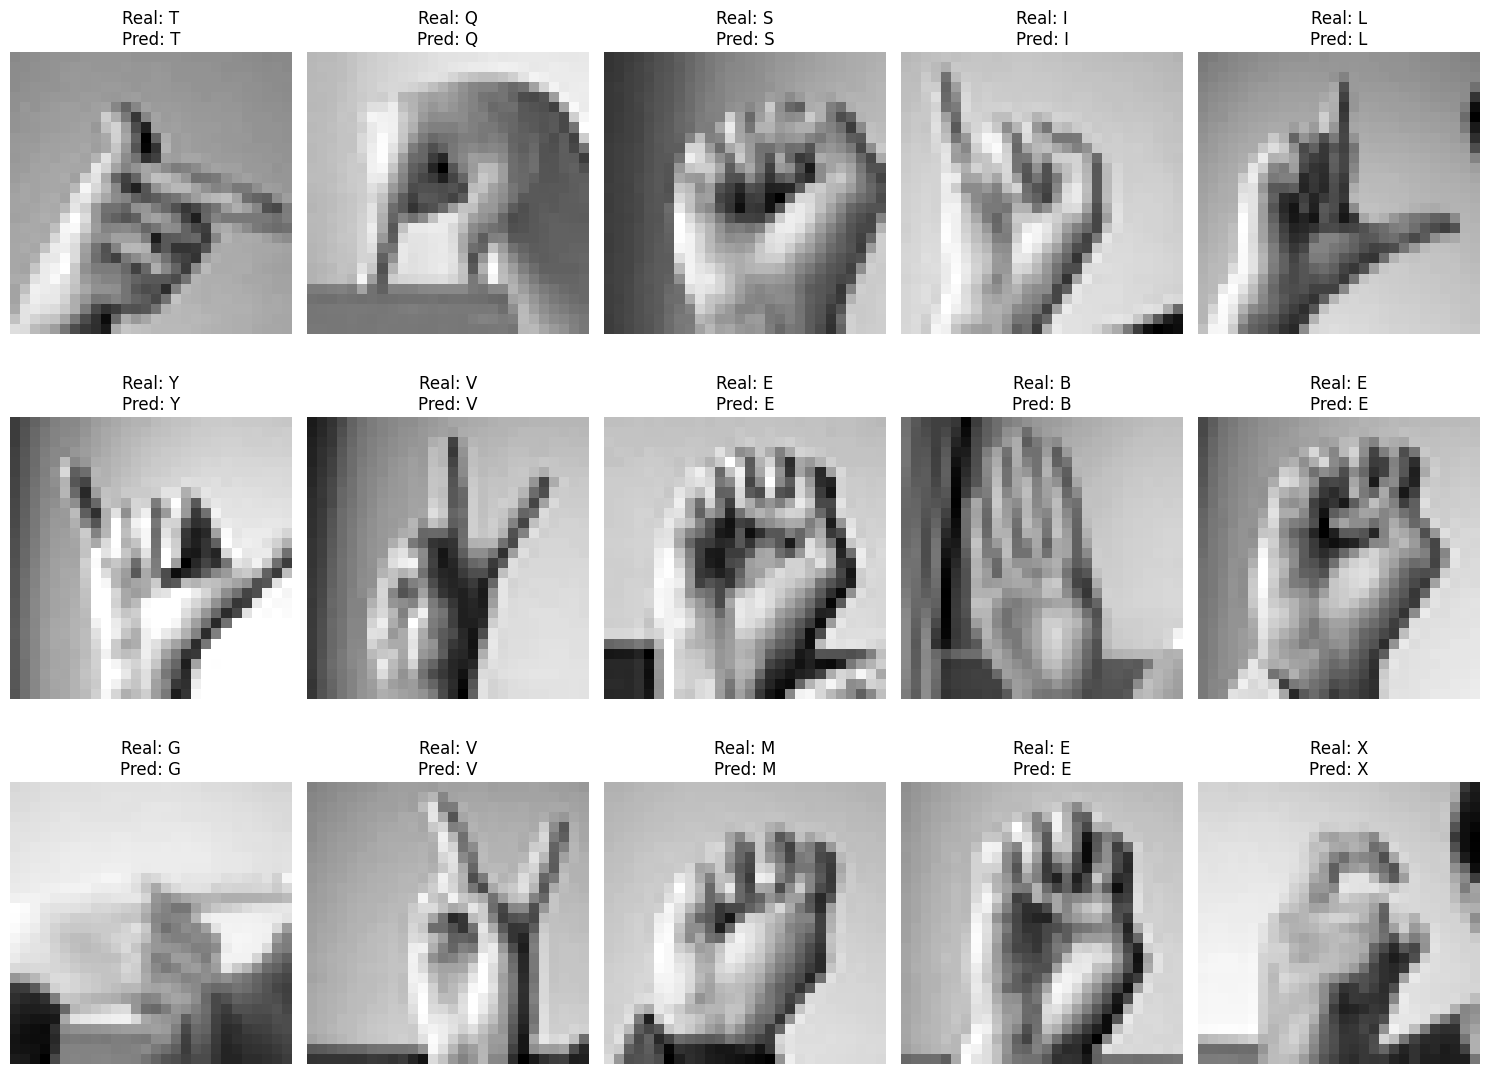

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
  Muestra los aciertos y errores en las predicciones del modelo, diferenciando entre verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?
  Resume métricas clave de rendimiento como precisión, recall y F1-score para cada clase, mostrando la calidad de las predicciones.
  
3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?

Evaluar con X_test y y_test muestra el rendimiento del modelo en datos no vistos, verificando su capacidad de generalización.

4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?

np.argmax selecciona el índice de la clase con la mayor probabilidad predicha, permitiendo identificar la etiqueta predicha para cada muestra.

5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?

Un heatmap de la matriz de confusión visualiza errores y aciertos entre clases, destacando patrones en el rendimiento del modelo.
```



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.model_selection import GridSearchCV

epochs = 3
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.9954834720382885 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [ ]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9118795315114333




```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?
  Es una técnica para encontrar la mejor combinación de hiperparámetros probando exhaustivamente todas las opciones en una cuadrícula definida, optimizando el rendimiento del modelo.

2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?
  Contiene los hiperparámetros y sus valores a probar. Ajustar el optimizador y la tasa de dropout es crucial, ya que influyen en la velocidad de aprendizaje y en la reducción del sobreajuste.

3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?
  Divide los datos en 3 subconjuntos para la validación cruzada, evaluando el modelo en varias particiones para obtener una evaluación más confiable y reducir la variabilidad en los resultados.
```



# Temas grupales

1. Arquitectura de Redes Neuronales Convolucionales
2. Funciones de Activación en CNN
3. Técnicas de Preprocesamiento de Imágenes
4. Entrenamiento y Optimización de Modelos
5. Regularización en CNN
6. Evaluación de Modelos CNN
7. Aplicaciones de Redes Neuronales Convolucionales

Ejemplo:



```
Arquitectura de Redes Neuronales Convolucionales
(Autor/es): [Nombres de los estudiantes del grupo]
Contenido:
Este tema abarca la estructura fundamental de las redes neuronales convolucionales, que incluye las siguientes capas:

Capas Convolucionales: Estas capas son responsables de extraer características relevantes de las imágenes mediante la aplicación de filtros (kernels) que realizan operaciones de convolución.

Capas de Pooling: Se utilizan para reducir la dimensionalidad de las características extraídas, manteniendo las más importantes. Las capas de pooling ayudan a hacer que el modelo sea menos sensible a pequeñas variaciones en las imágenes.

Capas Totalmente Conectadas: Estas capas se encuentran al final de la red y son responsables de la clasificación final de las características extraídas. Conectan todas las neuronas de la capa anterior a cada neurona de la capa siguiente.

<img_url>: [URL de una imagen de arquitectura de CNN]

Referencias: [Referencia bibliográfica o enlace a un recurso]
```

